## Demo for modelling 4Pi-PSF from bead data

#### Setup environment

In [5]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

Running on GPU


##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='zernike',channeltype='4pi',sysfile='4pi')

##### Edit user defined parameters

In [3]:
L.param.datapath = main_data_dir+'/4pi_40nm_bead/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = 'bead' # keyword for your data file
L.param.subfolder = 'bead' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.44
L.param.ccd_offset = 100
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 20 # lower this number if out of memory 
L.param.batch_size = 20

##### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:/EMBL files/data for PSF learning//example data for uiPSF/4pi_40nm_bead\bead10_step50nm_060\bead10_step50nm__560_00000_00020_mode000_amp000.mat
E:/EMBL files/data for PSF learning//example data for uiPSF/4pi_40nm_bead\bead11_step50nm_061\bead11_step50nm__560_00000_00020_mode000_amp000.mat
E:/EMBL files/data for PSF learning//example data for uiPSF/4pi_40nm_bead\bead12_step50nm_062\bead12_step50nm__560_00000_00020_mode000_amp000.mat
E:/EMBL files/data for PSF learning//example data for uiPSF/4pi_40nm_bead\bead13_step50nm_063\bead13_step50nm__560_00000_00020_mode000_amp000.mat
E:/EMBL files/data for PSF learning//example data for uiPSF/4pi_40nm_bead\bead14_step50nm_064\bead14_step50nm__560_00000_00020_mode000_amp000.mat
E:/EMBL files/data for PSF learning//example data for uiPSF/4pi_40nm_bead\bead15_step50nm_065\bead15_step50nm__560_00000_00020_mode000_amp000.mat
E:/EMBL files/data for PSF learning//example data for uiPSF/4pi_40nm_bead\bead16_step50nm_066\bead16_step50nm__560_00000_000

3/6: learning: 54/100 [00:05s] 10.73it/s, current loss: 0.54216, total time: 5.03s
3/6: learning: 53/100 [00:04s] 10.70it/s, current loss: 0.50226, total time: 9.98s
3/6: learning: 54/100 [00:05s] 10.47it/s, current loss: 0.54621, total time: 15.13s
3/6: learning: 53/100 [00:05s] 10.41it/s, current loss: 0.53450, total time: 20.22s
3/6: learning: 154/250 [01:01s]  2.49it/s, current loss: 2.14910, total time: 82.10s
4/6: calculating spline coefficients: 4/4 [00:10s]  2.66s/it total time: 92.72s
5/6: localization: 4/4 [00:04s]  1.09s/it total time: 97.09s


outlier id: [10]
rois shape channel 0: (18, 3, 21, 21, 21)
rois shape channel 1: (18, 3, 21, 21, 21)
rois shape channel 2: (18, 3, 21, 21, 21)
rois shape channel 3: (18, 3, 21, 21, 21)


3/6: learning: 66/250 [00:25s]  2.57it/s, current loss: 2.12446, total time: 122.75s
4/6: calculating spline coefficients: 4/4 [00:10s]  2.65s/it total time: 133.34s
5/6: localization: 4/4 [00:04s]  1.10s/it total time: 137.73s
6/6: saving results: [00:21s] total time: 159.53s


##### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

channel 0


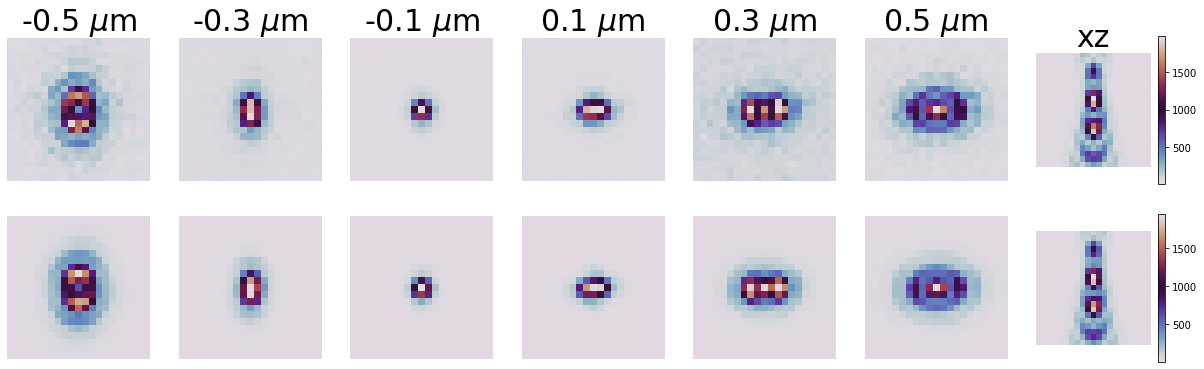

channel 1


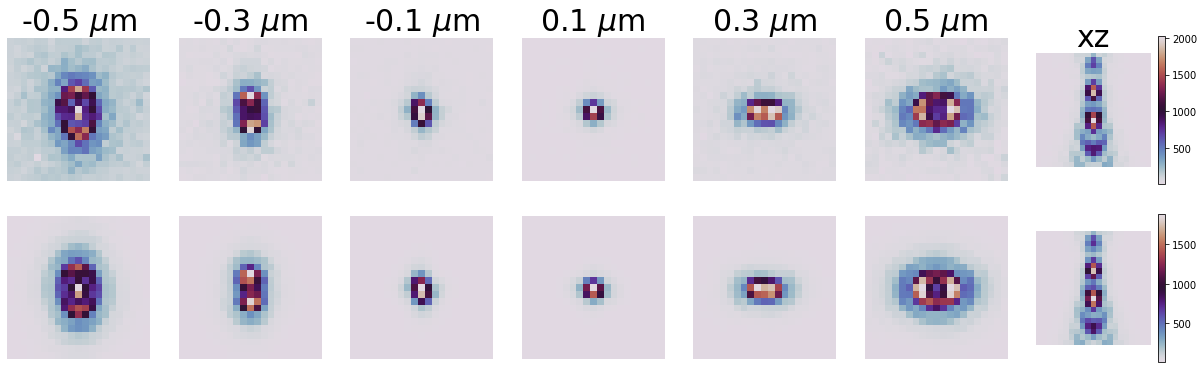

channel 2


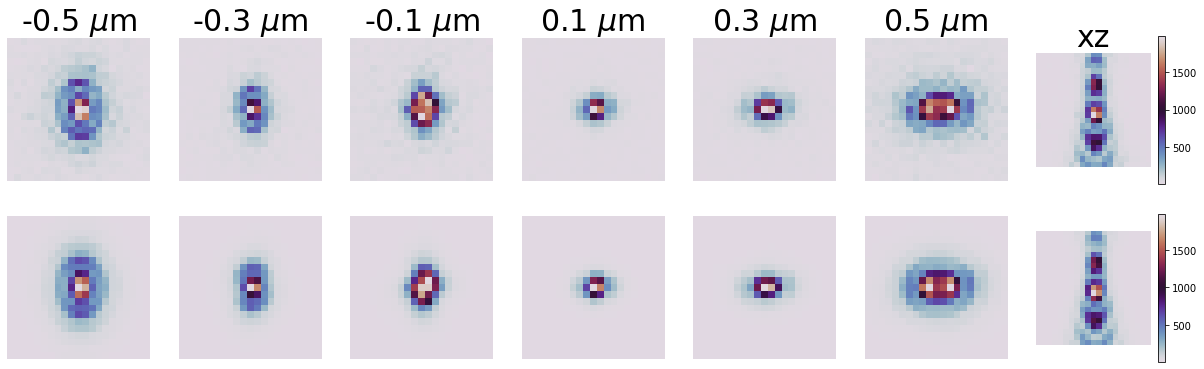

channel 3


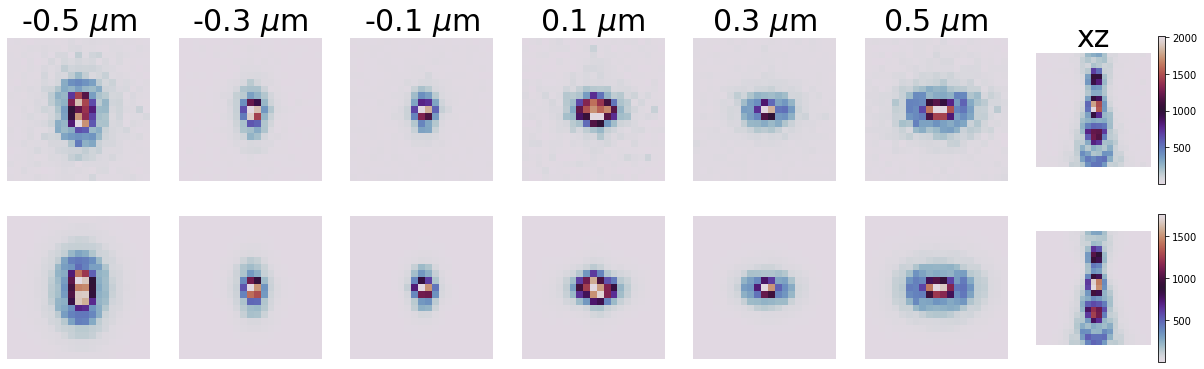

In [6]:
showpsfvsdata(f,p,index=0)

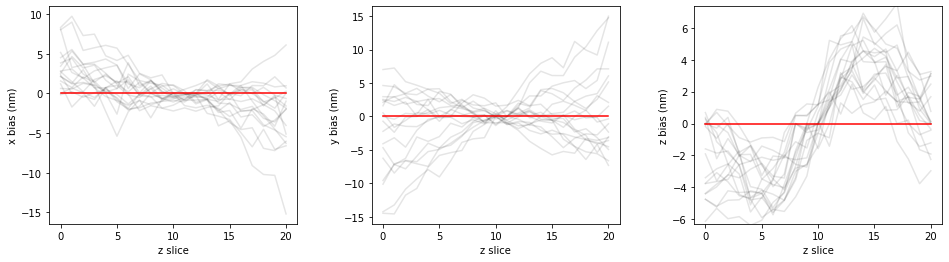

In [7]:
showlocalization(f,p)

##### Optional plots

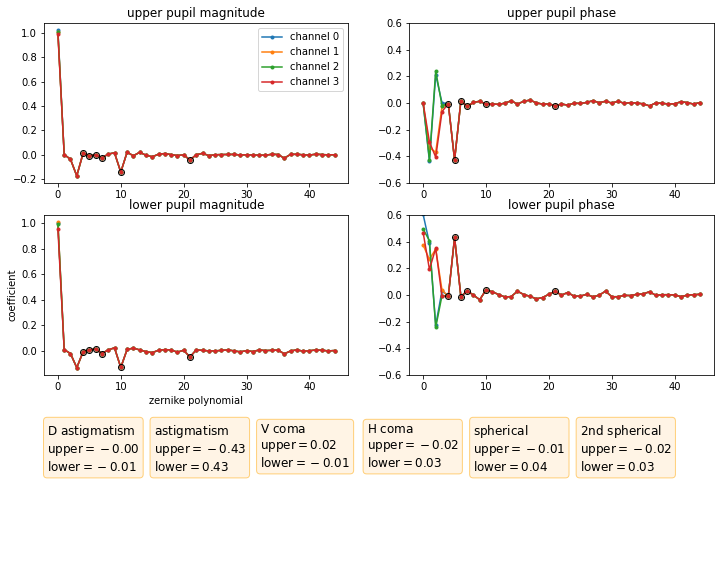

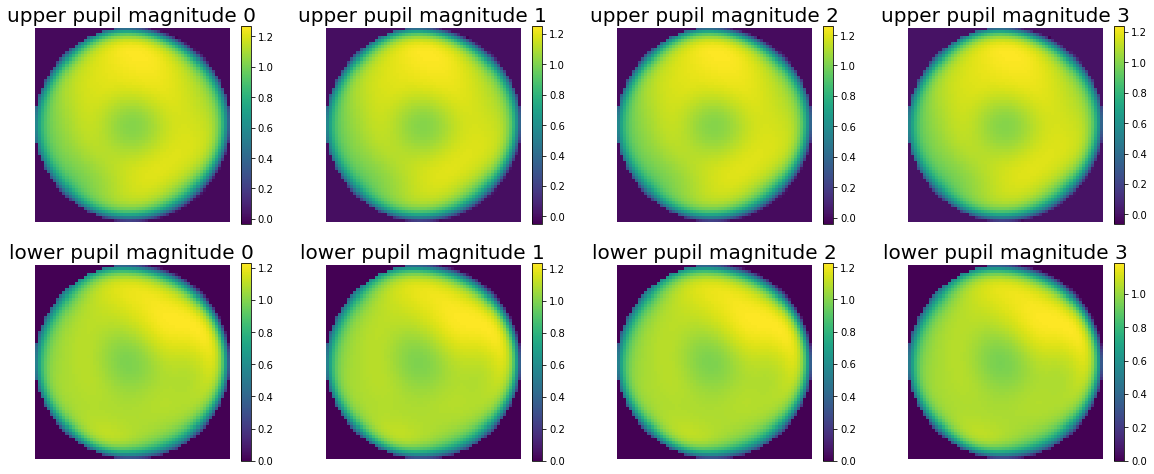

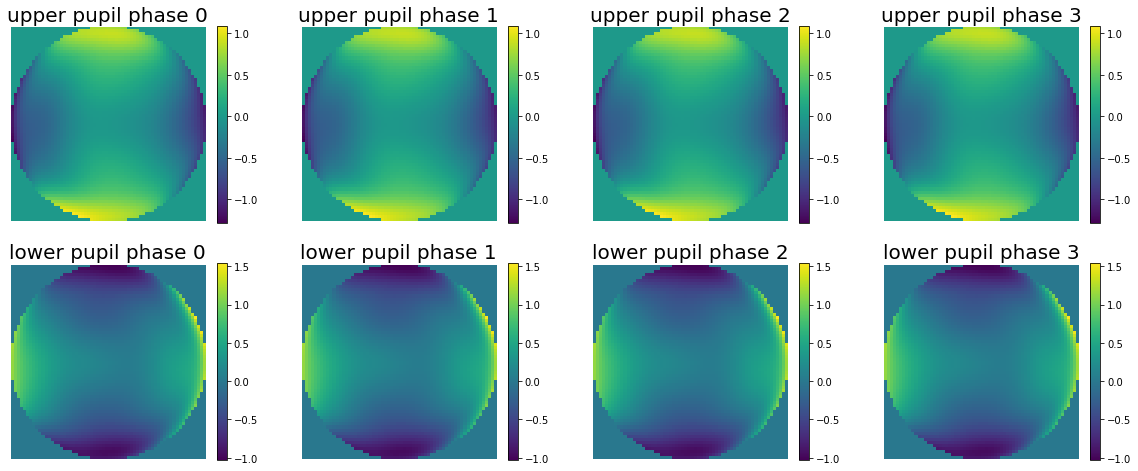

In [8]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

[[[ 0.998   0.0063 -0.    ]
  [-0.0052  0.9983  0.    ]
  [-0.9717  0.3873  1.    ]]

 [[ 0.9955  0.0014 -0.    ]
  [ 0.0011  0.9965  0.    ]
  [-0.6115  1.4509  1.    ]]

 [[ 0.9959 -0.006  -0.    ]
  [ 0.0057  0.9982  0.    ]
  [-0.3958  0.857   1.    ]]]


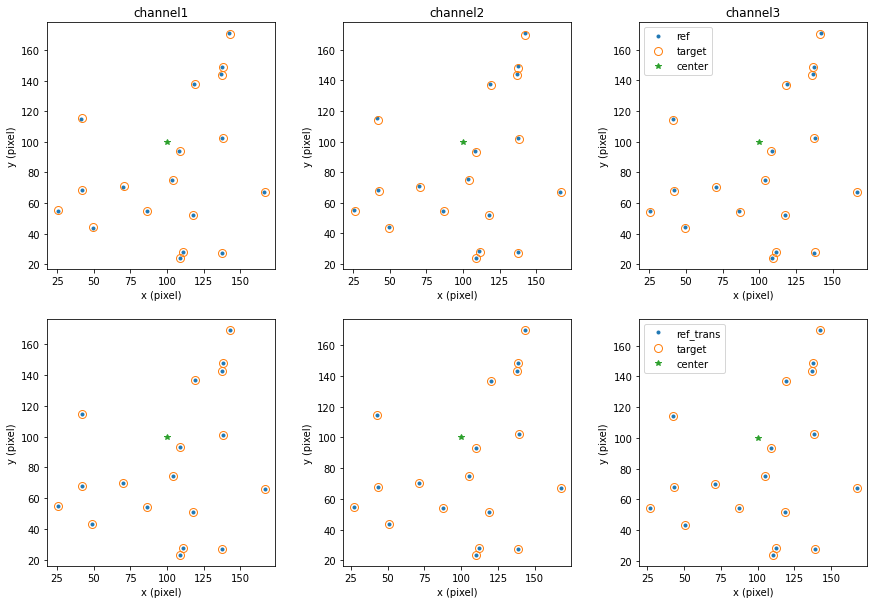

In [9]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

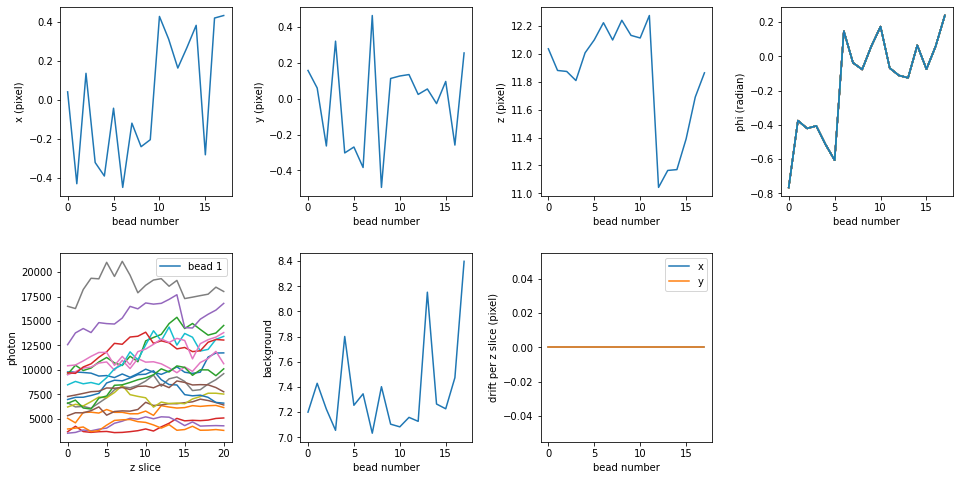

In [10]:
showlearnedparam(f,p)

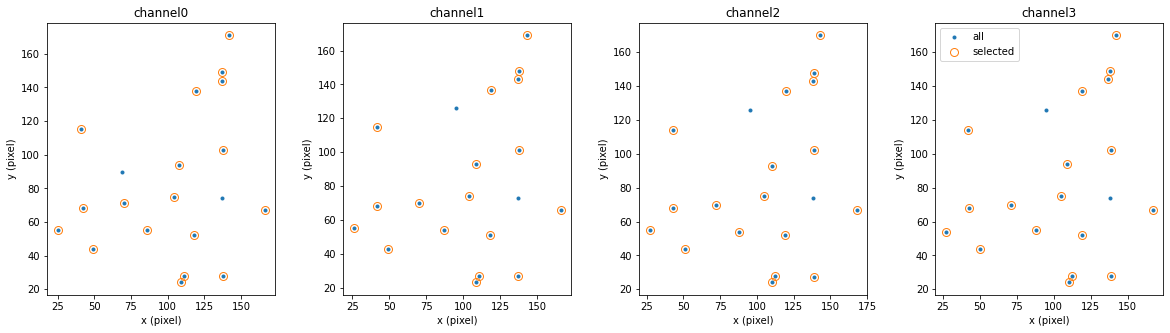

In [11]:
showcoord(f,p)

#### Ouput parameters

In [12]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['T', 'channel0', 'channel1', 'channel2', 'channel3', 'imgcenter', 'xyshift']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
